# Lab 3 Logistic Regression
## Team member
Xiaoqing Zou, Jonathan Mejia, Rongwei Ji

## Data introduction
Data source: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster 

Data file name: Lab3/data/ObesityDataSet.csv

17 colums total, 2111 rows, it contains the categorical targets



## 1.Preperation and Overview
### Task Explaination
This task is a classification problem designed to predict the degree of obesity based on given features (gender, age, height, weight, family history of obesity, smoking habits，etc). The degree of obesity can be categorized into several levels, such as Insufficient_Weight,Normal_Weight,Overweight_Level_I ,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III.


The business context of this task may lie in the healthcare sector, where doctors or health experts aim to assess the obesity risk of patients based on their features to develop personalized health management plans. Additionally, insurance companies might be interested as obesity can increase the risk of certain health issues, impacting insurance claim costs.


Stakeholders interested in the results include healthcare providers, health insurance companies, and individuals interested in managing their health. The model could be deployed in healthcare institutions or insurance company systems to assist decision-making or provide personalized recommendations.

Deploy question:
This model could be deploied online, and it can directly be used for custom or people to give the value of Obesity level after they finished certain survey question. So at this situation, we would also concern about the performance.


### Data preperation
For this task, we would prepare our dataset by selecting relevant features such as gender, age, height, weight, family history of obesity, smoking habits,etc. We have do something preparation in Lab1 assignement, which I use the dataset for this lab3 assignment. After preprocessing, we will have a final dataset ready for classification.

In [5]:
# we could start with the lab1 data and show the preperation visualisation.
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import pandas as pd
import numpy as np


print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

df = pd.read_csv('ObesityDataSetOriginal.csv') # read in the csv file
print(df.info())
df.head()

Pandas: 1.5.3
Numpy: 1.26.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF   

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Data understanding
In the lab1 we have already know much about this dataset, and there are several attributes can contribute our target class( `NOBeyesdad`) and now we still can do something about the encoding to make them all numerical. After that we can using the regression to do test.

#### Encoding
We still need make all data are numeric, this part can directly using the code from our lab1 assignment.



In [6]:
df.replace(to_replace=['no','Sometimes','Frequently','Always','yes'],value=[0,1,2,3,1],inplace=True)
df.replace(to_replace=['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III'],value=[1,2,3,4,0,5,6],inplace=True)
df.replace(to_replace=['Female','Male'],value=[0,1],inplace=True)
df.replace(to_replace=['Public_Transportation','Walking', 'Automobile', 'Motorbike', 'Bike'],value=[1,2,3,4,5],inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,1,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,1,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,1,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,1,3


In [7]:
df_describe=pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Attribute']=df.columns
df_describe['Description']=['Gender','Age','Height','Weight','family',
                            'Frequent consumption of high caloric food',
                            'Frequency of consumption of vegetables',
                            'Number of main meals',
                            'Consumption of food between meals',
                            'SMOKE',
                            'Consumption of water daily','Calories consumption monitoring',
                            "Physical activity frequency",
                          
                            "Time using technology devices",
                            "Consumption of alcohol",
                            "Transportation used","Obeyesdad"]
df_describe['Type']=['Bool,1/0','Interval,float','Ratio,float','Ratio,float','Bool,1/0','ratio,float','ratio,float','ratio,float','ratio,float',"Bool,1/0","Ordinal,int","Bool,1/0","ratio,float","ratio,float","Ordinal,int","norminal","Ordinal,int"]
df_describe['Convertion/Range']=['1=male,0=female',"14-65",'1.45-1.98','39-173','yes=1.no=0','1-3','1-3','1-3','0=no,1=sometimes,2=frequently,3=always','yes=1.no=0','1-3','yes=1.no=0','0-3','0-2','0=no,1=sometimes,2=frequently,3=always','','Normal_Weight=1,Overweight_Level_I=2 ,Overweight_Level_II=3,Obesity_Type_I=4, Insufficient_Weight=0,Obesity_Type_II=5,Obesity_Type_III=6']
df_describe

,Attribute,Description,Type,Convertion/Range
0,Gender,Gender,"Bool,1/0","1=male,0=female"
1,Age,Age,"Interval,float",14-65
2,Height,Height,"Ratio,float",1.45-1.98
3,Weight,Weight,"Ratio,float",39-173
4,family_history_with_overweight,family,"Bool,1/0",yes=1.no=0
5,FAVC,Frequent consumption of high caloric food,"ratio,float",1-3
6,FCVC,Frequency of consumption of vegetables,"ratio,float",1-3
7,NCP,Number of main meals,"ratio,float",1-3
8,CAEC,Consumption of food between meals,"ratio,float","0=no,1=sometimes,2=frequently,3=always"
9,SMOKE,SMOKE,"Bool,1/0",yes=1.no=0


Above table is currently data table, at this time we do not need to something missing handling and duplicate issue handling. We could focuing on the modeling and our main target.

`NObeyesdad` is our target for classification, and below is breakdown and distribution about this target of this dataset:

In [8]:
df.describe() # show the summary statistics

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,1.488394,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.868475,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,1.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,1.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,2.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,6.000000


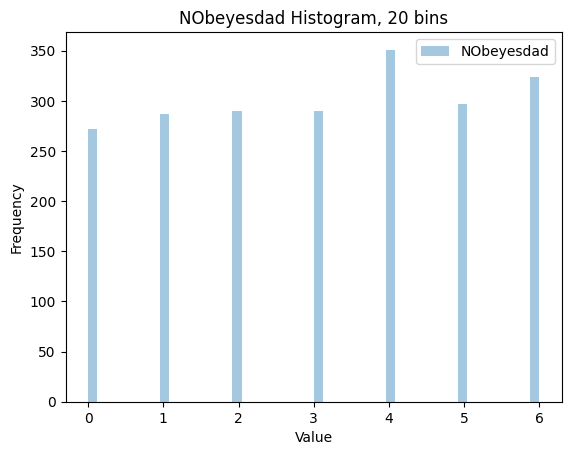

In [9]:
import matplotlib.pyplot as plt

df.NObeyesdad.plot(kind='hist',bins=50,alpha=0.4,label='NObeyesdad')
plt.title('NObeyesdad Histogram, 20 bins')
plt.xlabel("Value")
plt.legend()
plt.show()


### Features select
For better accuracy we could based on the Lab1 to select certain features which could more representitive.


In [10]:
selected_columns =["family_history_with_overweight","FAVC","CAEC","FCVC","FAF","Weight","Height","Gender","Age","NObeyesdad"] # which are the higher related columns
df=df[selected_columns]

### Data Splitting
We will split our dataset into training and testing sets using an 80/20 split, where 80% of the data will be used for training the model and 20% for testing its performance. This split is appropriate as it provides an adequate amount of data for training while still reserving a sizable portion for evaluation. With a larger training set, the model can learn more complex patterns in the data, leading to potentially better performance. However, it's essential to ensure that the testing set is representative of the overall data distribution to obtain reliable performance metrics.

In [11]:
# convert data into 80/20 split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# define x and y of dataset
x = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



### Argue "for" or "against" 80/20split
When we use the 80/20 split function to train model and test the model, we should consider the data balance or imbalance. Then we could determin is argueing or argue against the 80/20 split.

Now show the distribution about train and test

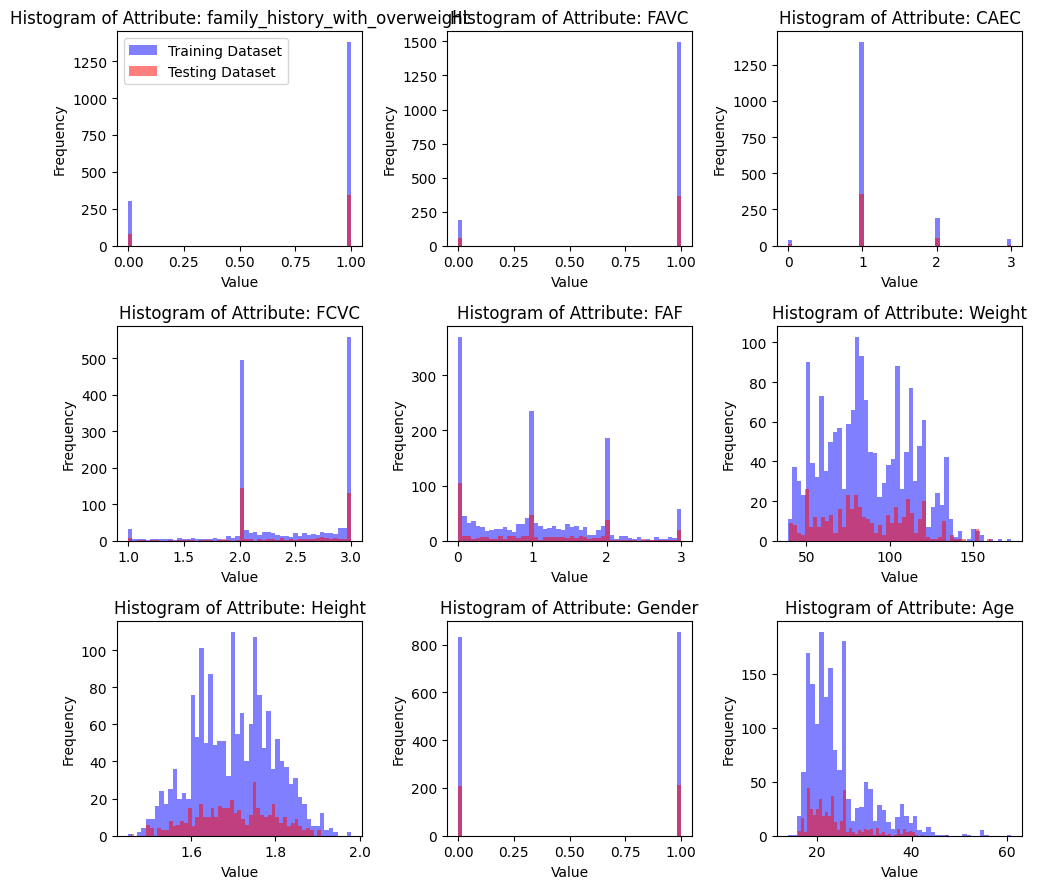

In [12]:
import matplotlib.pyplot as plt

# Number of attributes (columns)
num_attributes = len(x_train.columns)

# Calculate the number of rows and columns needed for the subplots
num_rows = (num_attributes + 2) // 3  # Round up to the nearest integer
num_cols = min(num_attributes, 3)     # Maximum 3 columns per row

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Plot histograms for each attribute
for i, col in enumerate(x_train.columns):
    row_index = i // 3  # Determine the row index for the subplot
    col_index = i % 3   # Determine the column index for the subplot
    
    # Plot histogram for training dataset
    axs[row_index, col_index].hist(x_train[col], bins=50, color='blue', alpha=0.5)

    # Plot histogram for testing dataset
    axs[row_index, col_index].hist(x_test[col], bins=50, color='red', alpha=0.5)

    # Add labels and title
    axs[row_index, col_index].set_xlabel('Value')
    axs[row_index, col_index].set_ylabel('Frequency')
    axs[row_index, col_index].set_title(f'Histogram of Attribute: {col}')

# Add legend outside the loop
axs[0, 0].legend(['Training Dataset', 'Testing Dataset'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

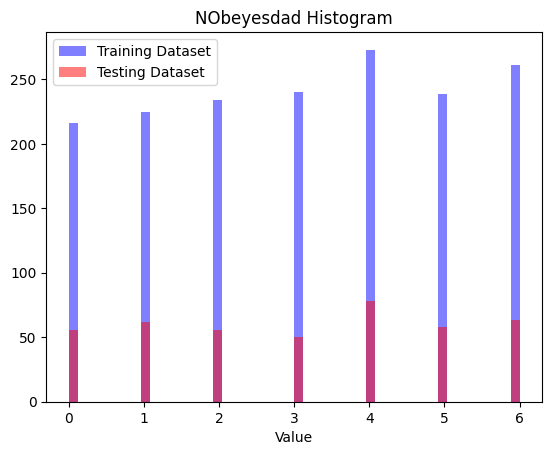

In [13]:
import matplotlib.pyplot as plt

# distribution of training and testing datasets in target variable
plt.hist(y_train, bins=50, color='blue', alpha=0.5, label='Training Dataset')
plt.hist(y_test, bins=50, color='red', alpha=0.5, label='Testing Dataset')
plt.title('NObeyesdad Histogram')
plt.xlabel("Value")
plt.legend()
plt.show()


Based on the visualizaiton of the distribution of train and test, we could find 80/20 will be good split ratio to build and test model. There is no any extremly imbalance.

[0.95266272 0.93491124 0.92899408 0.94674556 0.92899408 0.91715976
 0.94674556 0.95266272 0.96428571 0.93452381]
Average 5-Fold CV Score: 0.9407685263454495
Standard deviation: 0.013473695893316512
Variance: 0.00018154048102557422


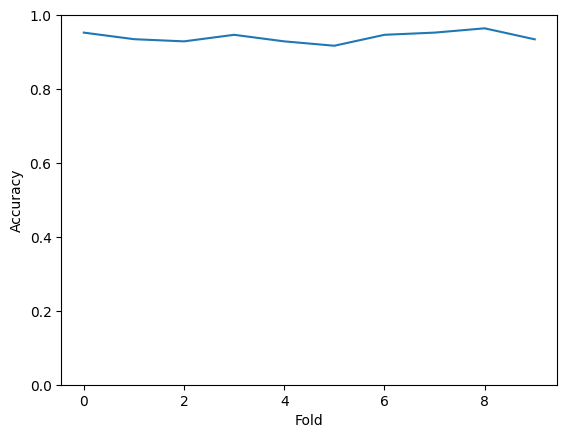

In [14]:
# using cross-validation to estimate the 80/20 split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# split the data into 5 folds
cv_scores = cross_val_score(DecisionTreeClassifier(), x_train, y_train, cv=10)
# print the cross-validation scores
print(cv_scores)
# print the average cross-validation score
print('Average 5-Fold CV Score: {}'.format(np.mean(cv_scores)))
# print the standard deviation of the cross-validation scores
print('Standard deviation: {}'.format(np.std(cv_scores)))
# print the variance of the cross-validation scores
print('Variance: {}'.format(np.var(cv_scores)))
# show 10 fold cross validation in one plot, which y is from 0 to 1
# add the label for the x-axis and y-axis
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.plot(cv_scores)


Based on the analysis above, we could conclude that the 80/20 split will works for our dataset and the modeling below. It result the balance data in train and test, it also show the great result in cross validation.

## 2 Modeling

###  one-versus-all logistic regression
We directly use the one vs all logistic regression code from the lecture to caculate our data.
It's based on the binary logistic Regression 

#### Logistic Regression
- choose optimization technique through solver
- customizable regularization term
- multi-class logistic regression 


In [15]:
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta=0.01, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [16]:
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

In [17]:
class LogisticRegression:
    def __init__(self, eta=0.01, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = BinaryLogisticRegression(self.eta, self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

### Data scaled
Make the numerical data scaled can be help to improve the accuracy

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
numerical_coloums = ['Age', 'Height', 'Weight', 'FCVC', 'FAF']
categorical_binary_coloums = ['family_history_with_overweight',"CAEC", 'FAVC',"Gender"]
scaler = StandardScaler().fit(x_train[numerical_coloums])
x_train[numerical_coloums] = scaler.transform(x_train[numerical_coloums])
x_test[numerical_coloums] = scaler.transform(x_test[numerical_coloums])

params = dict(eta=0.1, iterations=500)
lr = LogisticRegression(**params)
lr.fit(x_train, y_train)
yhat = lr.predict(x_test)
print('Accuracy of: ', accuracy_score(y_test, yhat))

Accuracy of:  0.6595744680851063


#### Methods

In [19]:
from numpy.linalg import pinv

class OptimizedBinaryLogisticRegression(BinaryLogisticRegression):
    # extend init functions
    def __init__(self, optimization='steepestascent', **kwds):        
        # need to add to the original initializer 
        self.optimization = optimization
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
    
    # completely overload gradient function
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        if self.optimization == "steepestascent":
            return self._opt_steepest_descent(X,y) 
        elif self.optimization == "stochasticgradient":
            return self._opt_stochastic_descent(X,y)
        elif self.optimization == "newton":
            return self._opt_newtons_method(X,y)
              
    def _opt_steepest_descent(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return gradient
    
    def _opt_stochastic_descent(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return gradient
    
    def _opt_newtons_method(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * 0 # calculate the hessian
        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return pinv(hessian) @ gradient #need to import pinv

In [20]:
# now redefine the Logistic Regression Function where needed
class OptimizedLogisticRegression(LogisticRegression):
    def __init__(self, optimization='steepestascent', **kwds):        
        # need to add to the original initializer 
        self.optimization = optimization
        # but keep other keywords
        super().__init__(**kwds) # call parent initializer
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = OptimizedBinaryLogisticRegression(eta=self.eta,
                                                    iterations=self.iters,
                                                    optimization=self.optimization)
            
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

In [21]:
# run each method to get the accuracy
# also get the run time for each method
import time
methods = ['steepestascent','stochasticgradient','newton']
accuracy_list = []
for method in methods:
    # star time 
    start = time.time()
    lr = OptimizedLogisticRegression(eta=0.1,iterations=300,optimization=method)
    lr.fit(x_train.values,y_train.values)
    yhat = lr.predict(x_test.values)
    accuracy = np.mean(yhat == y_test)
    end = time.time()
    # get the run cost
    run_time = end - start
    #print the accuracy and run time
    print('Optimization Method: {}'.format(method))
    print('Accuracy: {}'.format(accuracy))
    print('Run Time: {}'.format(run_time))
    print('')
    # save accuracy time, name in the list
    accuracy_list.append((accuracy,run_time,method))
    


Optimization Method: steepestascent
Accuracy: 0.6217494089834515
Run Time: 0.3472580909729004

Optimization Method: stochasticgradient
Accuracy: 0.5177304964539007
Run Time: 0.015625476837158203

Optimization Method: newton
Accuracy: 0.7470449172576832
Run Time: 16.042670011520386



In [22]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

start_time = time.time()  # Record the start time of the iteration
lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(x_train,y_train)
#print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(x_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))
# add accuracy and time cost of sklearn model to time_cost and accuracy list
end_time = time.time() # Record the end time of the iteration
# Calculate the time taken for this iteration
time_taken = end_time - start_time
# add this to accuracy list
accuracy_list.append((accuracy,time_taken,'sklearn'))



Accuracy of:  0.735224586288416


[(0.6217494089834515, 0.3472580909729004, 'steepestascent'), (0.5177304964539007, 0.015625476837158203, 'stochasticgradient'), (0.7470449172576832, 16.042670011520386, 'newton'), (0.7470449172576832, 0.018465757369995117, 'sklearn')]


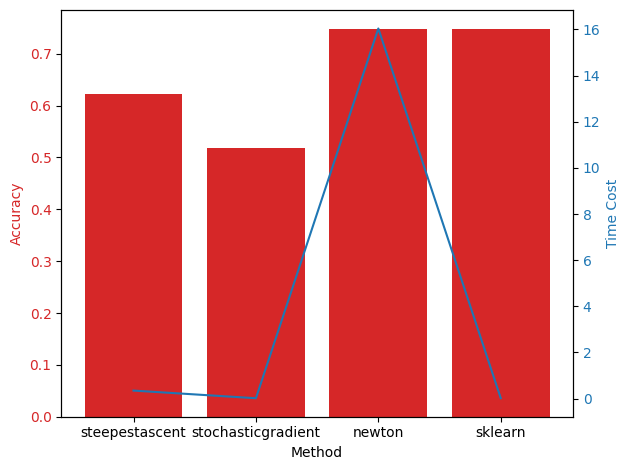

In [23]:
# visualize the accuracy and time cost of each method
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# in a plot using bar show the accuracy and line to show the timecost , data soucrce is accuracy_list

print (accuracy_list)
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Method')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar([x[2] for x in accuracy_list],[x[0] for x in accuracy_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Time Cost', color=color)  # we already handled the x-label with ax1
ax2.plot([x[2] for x in accuracy_list],[x[1] for x in accuracy_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()






At this time, we find the accuracy about 50 in our custom.about 500 when we set the `eta=0.1` and `iterations=20` which have tried sveral values for better accuracy and time cost. 

We could do more performace about our customs method( Steepest Acendence)

We can know the sklearn method has the better accuracy and the better perfomance and faster. 

We can assume the newton method will have great accuracy, but the time cost are too much. We will find out is there any way to reduce the time spend, or increas the two other's accuracy.

## Train model and adjust

#### Regularized

In [24]:
class OptimizedRegularizedBinaryLogisticRegression(OptimizedBinaryLogisticRegression):
    # extend init functions
    def __init__(self, regularization='L2', C=0.0, **kwds):        
        # need to add to the original initializer 
        self.regularization = regularization
        self.C = C
        super().__init__(**kwds) # call parent initializer
        
        
    # extend previous class to change functionality
    def _get_gradient(self,X,y):
        # call get gradient from previous class
        gradient = super()._get_gradient(X,y)
        
        # add in l1, l2, or l1 + l2 regularization (to all except bias term)
        if self.regularization == 'L2':
            gradient[1:] += (-2 * self.w_[1:] * self.C)
        elif self.regularization == 'L1':
            gradient[1:] += (-1 * np.sign(self.w_[1:]) * self.C)
        elif self.regularization == 'Both':
            l2_adj = (-2 * self.w_[1:] * self.C)
            l1_adj = (-1 * np.sign(self.w_[1:]) * self.C)
            gradient[1:] += (l2_adj + l1_adj)
            
        return gradient

In [34]:
class OptimizedRegularizedLogisticRegression(OptimizedLogisticRegression):
    def __init__(self, regularization='L2', C=0.0, **kwds):        
        # need to add to the original initializer 
        self.regularization = regularization
        self.C = C
        super().__init__(**kwds) # call parent initializer

        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = OptimizedRegularizedBinaryLogisticRegression(eta=self.eta,
                                                               iterations=self.iters,
                                                               optimization=self.optimization,
                                                               regularization=self.regularization,
                                                               C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

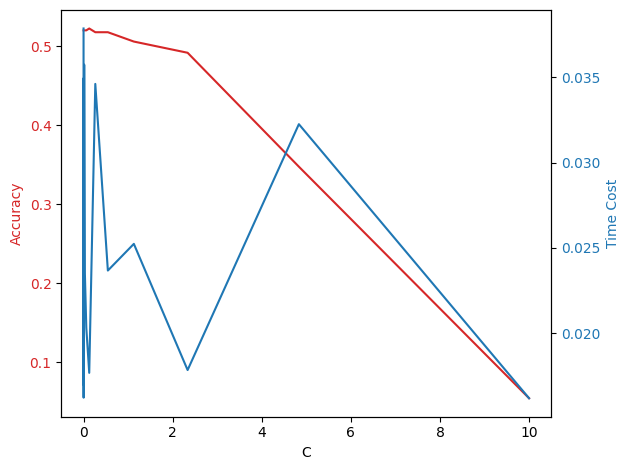

In [48]:
costs = np.logspace(-5,1,20)
# add plot to show the the c and accuracy
acc=[]
for c in costs:
    start = time.time()
    lr = OptimizedRegularizedLogisticRegression(eta=0.1,iterations=20,C=c,regularization='L2',optimization='steepestascent')
    lr.fit(x_train.values,y_train.values)
    yhat = lr.predict(x_test.values)
    # add c and accuracy to the list
    end_time = time.time()
    # Calculate the time taken for this iteration
    time_taken = end_time - start
    acc.append((c,accuracy_score(y_test,yhat),time_taken))


# add plot to show the the c and accuracy, time cost, using acc
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot([x[0] for x in acc],[x[1] for x in acc], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Time Cost', color=color)  # we already handled the x-label with ax1
ax2.plot([x[0] for x in acc],[x[2] for x in acc], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





In [ ]:
# generat several different training data from x and y , at different c value and show the accuracy.
# show on the boxplot 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# a for loop function each time generate 50 times of training data and test data, and get the accuracy of each time
# and save the accuracy to a list
# define the costs
costs = np.logspace(-5,1,10)
acc = []
for c in costs:
    temp_acc = []
    for i in range(50):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        scaler = StandardScaler().fit(x_train[numerical_coloums])
        x_train[numerical_coloums] = scaler.transform(x_train[numerical_coloums])
        x_test[numerical_coloums] = scaler.transform(x_test[numerical_coloums])
        start = time.time()
        lr = OptimizedRegularizedLogisticRegression(eta=0.1,iterations=20,C=c,regularization='L2',optimization='steepestascent')
        lr.fit(x_train.values,y_train.values)
        yhat = lr.predict(x_test.values)
        end_time = time.time()
        # Calculate the time taken for this iteration
        time_taken = end_time - start
        temp_acc.append(accuracy_score(y_test,yhat))
    acc.append(temp_acc)







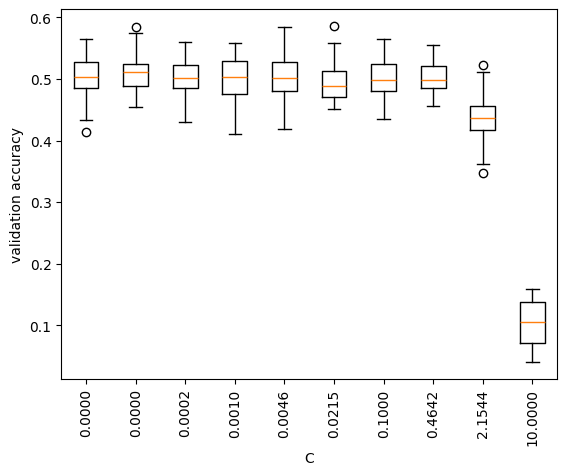

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.boxplot(acc)
plt.xticks(range(1,len(costs)+1),['%.4f'%(c) for c in costs],rotation='vertical')
plt.xlabel('C')
plt.ylabel('validation accuracy')
plt.show()

From this image, we could find out better c value for our model.

Now we could find out best method, best c value and regularized, to compared with sklearn.

In [ ]:
costs=[0.0001,0.001,0.01,0.1,1,2,3,10]
methods = ['steepestascent','stochasticgradient','newton']
reg= ['L2','L1','Both']
acc = []
# do the iteration to get the accuracy of each method and each c and each reg
for c in costs:
    for method in methods:
        for r in reg:
            temp_acc = []
            for i in range(5):
                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
                scaler = StandardScaler().fit(x_train[numerical_coloums])
                x_train[numerical_coloums] = scaler.transform(x_train[numerical_coloums])
                x_test[numerical_coloums] = scaler.transform(x_test[numerical_coloums])
                start = time.time()
                lr = OptimizedRegularizedLogisticRegression(eta=0.1,iterations=20,C=c,regularization=r,optimization=method)
                lr.fit(x_train.values,y_train.values)
                yhat = lr.predict(x_test.values)
                end_time = time.time()
                # Calculate the time taken for this iteration
                time_taken = end_time - start
                temp_acc.append(accuracy_score(y_test,yhat))
            acc.append((c,method,r,temp_acc))
# show the accuracy of each method and each c and each reg




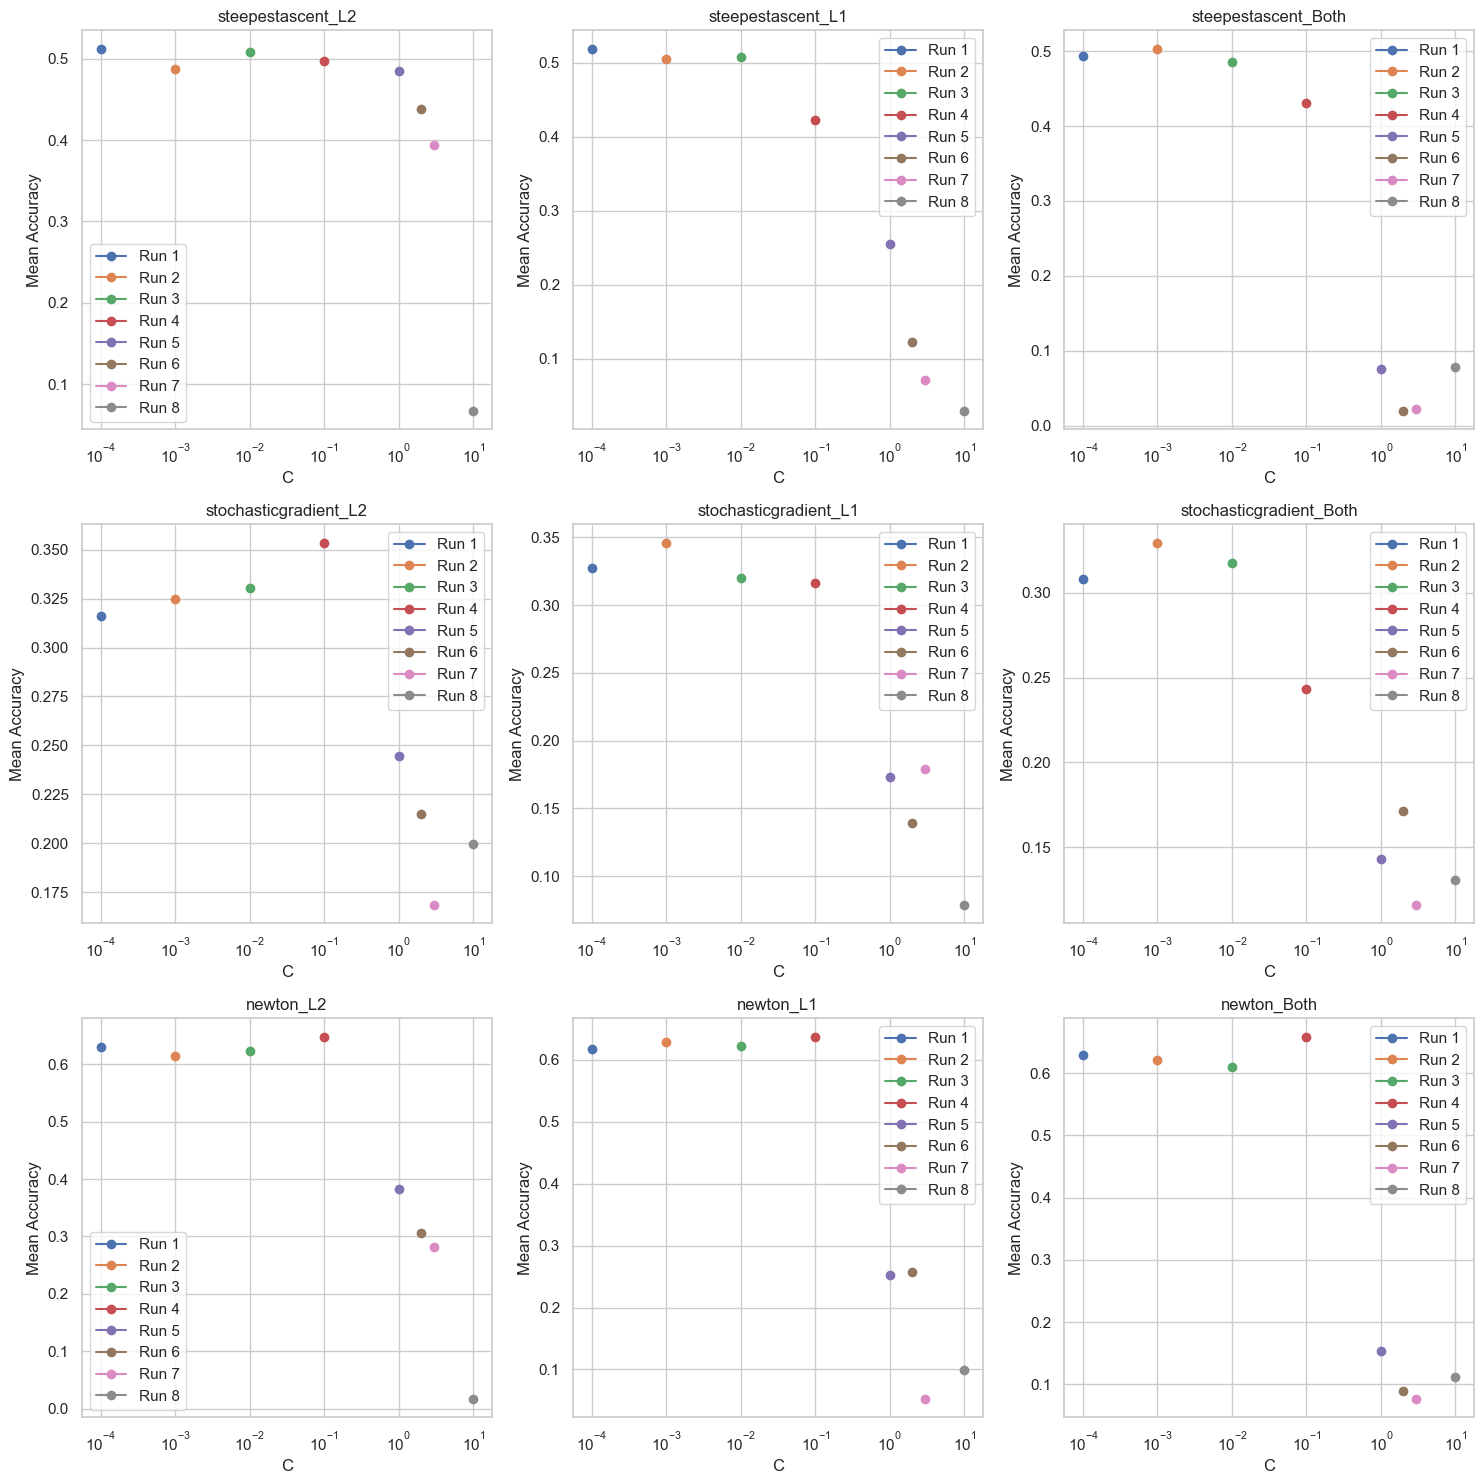

In [92]:
# show the acc in a plot with different c and reg and method
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# create a dataframe using the acc
df = pd.DataFrame(acc,columns=['C','Method','Regularization','Accuracy'])
# use the seaborn to show the boxplot

# show first five lines of  the df in table
df.head()
# show the table of the df 
# Create grid plot
# Calculate mean accuracy for each "C" value
df['Mean_Accuracy'] = df['Accuracy'].apply(lambda x: np.mean(x))

# Create grid plot
unique_combinations = df[['Method', 'Regularization']].drop_duplicates()

num_plots = len(unique_combinations)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for (method, regularization), ax in zip(unique_combinations.values, axes.flatten()):
    subset = df[(df['Method'] == method) & (df['Regularization'] == regularization)]
    for i, (_, row) in enumerate(subset.iterrows()):
        ax.plot(row['C'], row['Mean_Accuracy'], marker='o', label=f'Run {i+1}')
    ax.set_title(f'{method}_{regularization}')
    ax.set_xlabel('C')
    ax.set_ylabel('Mean Accuracy')
    ax.set_xscale('log')  # Set x-axis scale to logarithmic for better visualization of small values
    ax.legend()

# Remove unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



Based on the image above ,we could find out the newton_both will be better at accuracy, which is above the 0.6 at c=0.1. we could use this method to compared with sklearn's 

#### Data snoopping issue ?

Yes, Data snooping in the context of training a logistic regression model typically involves actions that inadvertently lead to overfitting or inflated performance estimates due to multiple testing or exploiting the training data excessively. 

We are choosing the hyperparameters to find better accuracy. It can direclty using the test data for multiple iterate, which may result a model problem.

### Compare with scikit-learn


In [97]:
# using the newton method , both regularization and c is about 0.1, and record the time cost and accuracy
# show the time cost and accuracy in a plot
c = 0.1
method = 'newton'
r = 'Both'
temp_acc = []
temp_time = []
# run 50 times to get the accuracy and time cost, show the time distribution and accuracy distribution, 
for i in range(300): # run 300 times spend 5 minutes
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    scaler = StandardScaler().fit(x_train[numerical_coloums])
    x_train[numerical_coloums] = scaler.transform(x_train[numerical_coloums])
    x_test[numerical_coloums] = scaler.transform(x_test[numerical_coloums])
    start = time.time()
    lr = OptimizedRegularizedLogisticRegression(eta=0.1,iterations=20,C=c,regularization=r,optimization=method)
    lr.fit(x_train.values,y_train.values)
    yhat = lr.predict(x_test.values)
    end_time = time.time()
    # Calculate the time taken for this iteration
    time_taken = end_time - start
    temp_acc.append(accuracy_score(y_test,yhat))
    temp_time.append(time_taken)


In [101]:
# using the sklearn model to get the accuracy and time cost, and show the accuracy and time cost in a plot 
# run the sklearn model 300 times and record the accuracy and time cost
temp_acc_skl = []
temp_time_skl = []
for i in range(300): # run 300 times spend 5 seconds
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    scaler = StandardScaler().fit(x_train[numerical_coloums])
    x_train[numerical_coloums] = scaler.transform(x_train[numerical_coloums])
    x_test[numerical_coloums] = scaler.transform(x_test[numerical_coloums])
    start = time.time()
    lr_sk = SKLogisticRegression(solver='liblinear') # all params default
    lr_sk.fit(x_train,y_train)
    yhat = lr_sk.predict(x_test)
    end_time = time.time()
    # Calculate the time taken for this iteration
    time_taken = end_time - start
    temp_acc_skl.append(accuracy_score(y_test,yhat))
    temp_time_skl.append(time_taken)





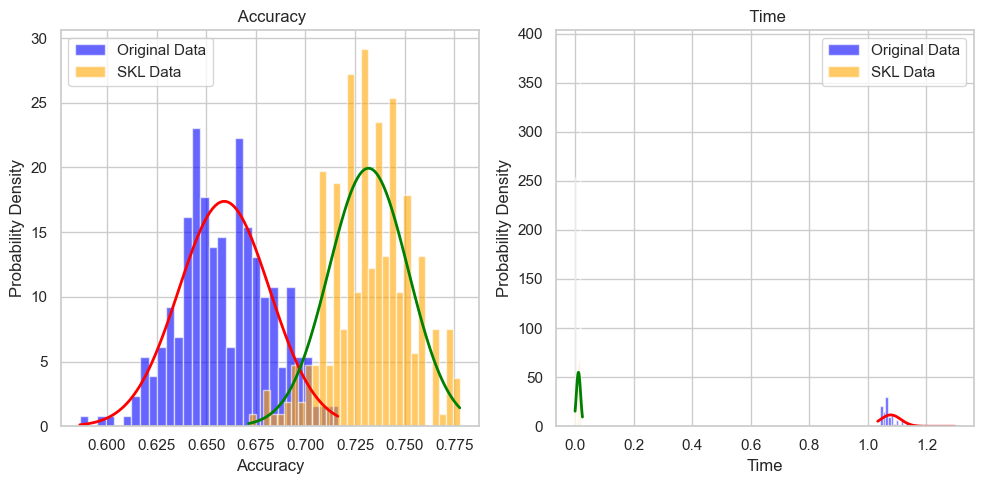

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the data for temperature accuracy and time
plt.figure(figsize=(10, 5))

# Histogram of temperature accuracy
plt.subplot(1, 2, 1)
plt.hist(temp_acc, bins=30, density=True, alpha=0.6, color='blue', label='Original Data')
plt.hist(temp_acc_skl, bins=30, density=True, alpha=0.6, color='orange', label='SKL Data')

# Fit a normal distribution to the original data
mu_acc, sigma_acc = np.mean(temp_acc), np.std(temp_acc)
x_acc = np.linspace(min(temp_acc), max(temp_acc), 100)
pdf_acc = (1/(sigma_acc * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_acc - mu_acc) / sigma_acc)**2)
plt.plot(x_acc, pdf_acc, color='red', linewidth=2)

# Fit a normal distribution to the SKL data
mu_acc_skl, sigma_acc_skl = np.mean(temp_acc_skl), np.std(temp_acc_skl)
x_acc_skl = np.linspace(min(temp_acc_skl), max(temp_acc_skl), 100)
pdf_acc_skl = (1/(sigma_acc_skl * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_acc_skl - mu_acc_skl) / sigma_acc_skl)**2)
plt.plot(x_acc_skl, pdf_acc_skl, color='green', linewidth=2)

plt.title(' Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Probability Density')
plt.legend()

# Histogram of temperature time
plt.subplot(1, 2, 2)
plt.hist(temp_time, bins=30, density=True, alpha=0.6, color='blue', label='Original Data')
plt.hist(temp_time_skl, bins=30, density=True, alpha=0.6, color='orange', label='SKL Data')

# Fit a normal distribution to the original data
mu_time, sigma_time = np.mean(temp_time), np.std(temp_time)
x_time = np.linspace(min(temp_time), max(temp_time), 100)
pdf_time = (1/(sigma_time * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_time - mu_time) / sigma_time)**2)
plt.plot(x_time, pdf_time, color='red', linewidth=2)

# Fit a normal distribution to the SKL data
mu_time_skl, sigma_time_skl = np.mean(temp_time_skl), np.std(temp_time_skl)
x_time_skl = np.linspace(min(temp_time_skl), max(temp_time_skl), 100)
pdf_time_skl = (1/(sigma_time_skl * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_time_skl - mu_time_skl) / sigma_time_skl)**2)
plt.plot(x_time_skl, pdf_time_skl, color='green', linewidth=2)

plt.title(' Time')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()


Clearly, scikit-learn outperforms in terms of both accuracy and time efficiency.

# 3 Deployment Choice: scikit-learn
For a deployed machine learning model, opting for the scikit-learn implementation is our preference. The primary rationale is that our custom implementation can achieve comparable accuracy to scikit-learn's implementation within a similar timeframe. If the model takes too long to execute or delivers lower accuracy, it becomes impractical for use, especially when scaling to larger datasets, rendering the model ineffective. In our specific case of classifying abalone ages, none of our classification methods yielded notably high accuracy. Hence, time efficiency carries significant weight in our decision-making process for model deployment. While our best method, Hessian Logistic Regression, nearly matches scikit-learn's accuracy, it suffers from a notable time disadvantage. Therefore, the scikit-learn implementation is preferred.

# 4 Exceptional Work - mean square error

In [105]:
#using the same base class, implement the MSEBinaryLogisticRegressionBase class

class MSEBinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta=0.01, iterations=20):
        self.eta = eta
        self.iters = iterations
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

In [106]:
# inherit from base class
class MSEBinaryLogisticRegression(MSEBinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(-2*(y-g)*g*(1-g)) @ X # calculate the hessian 
        # similar from the newtown

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return pinv(hessian) @ gradient #need to import pinv
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features, 1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ -= gradient * self.eta # multiply by learning rate

In [107]:
# it's same as the LogisticRegression class, but the base class is different
class MSELogisticRegression:
    def __init__(self, eta=0.01, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class
            blr = MSEBinaryLogisticRegression(self.eta, self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

In [108]:
# run this new method for 300 times to get the accuracy and time cost
temp_acc_mse = []
temp_time_mse = []
for i in range(300): # run 300 times spend 5 minutes
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    scaler = StandardScaler().fit(x_train[numerical_coloums])
    x_train[numerical_coloums] = scaler.transform(x_train[numerical_coloums])
    x_test[numerical_coloums] = scaler.transform(x_test[numerical_coloums])
    start = time.time()
    lr = MSELogisticRegression(eta=0.1,iterations=20)
    lr.fit(x_train.values,y_train.values)
    yhat = lr.predict(x_test.values)
    end_time = time.time()
    # Calculate the time taken for this iteration
    time_taken = end_time - start
    temp_acc_mse.append(accuracy_score(y_test,yhat))
    temp_time_mse.append(time_taken)

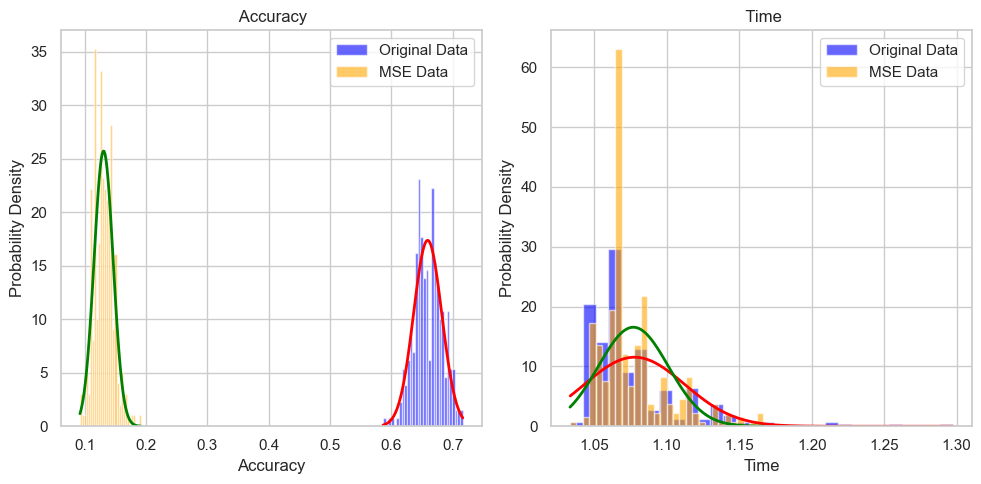

In [109]:
# Plotting the data for temperature accuracy and time
plt.figure(figsize=(10, 5))

# Histogram of temperature accuracy
plt.subplot(1, 2, 1)
plt.hist(temp_acc, bins=30, density=True, alpha=0.6, color='blue', label='Original Data')
plt.hist(temp_acc_mse, bins=30, density=True, alpha=0.6, color='orange', label='MSE Data')

# Fit a normal distribution to the original data
mu_acc, sigma_acc = np.mean(temp_acc), np.std(temp_acc)
x_acc = np.linspace(min(temp_acc), max(temp_acc), 100)
pdf_acc = (1/(sigma_acc * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_acc - mu_acc) / sigma_acc)**2)
plt.plot(x_acc, pdf_acc, color='red', linewidth=2)

# Fit a normal distribution to the MSE data
mu_acc_mse, sigma_acc_mse = np.mean(temp_acc_mse), np.std(temp_acc_mse)
x_acc_mse = np.linspace(min(temp_acc_mse), max(temp_acc_mse), 100)
pdf_acc_mse = (1/(sigma_acc_mse * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_acc_mse - mu_acc_mse) / sigma_acc_mse)**2)
plt.plot(x_acc_mse, pdf_acc_mse, color='green', linewidth=2)

plt.title(' Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Probability Density')
plt.legend()

# Histogram of temperature time
plt.subplot(1, 2, 2)
plt.hist(temp_time, bins=30, density=True, alpha=0.6, color='blue', label='Original Data')
plt.hist(temp_time_mse, bins=30, density=True, alpha=0.6, color='orange', label='MSE Data')

# Fit a normal distribution to the original data
mu_time, sigma_time = np.mean(temp_time), np.std(temp_time)
x_time = np.linspace(min(temp_time), max(temp_time), 100)
pdf_time = (1/(sigma_time * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_time - mu_time) / sigma_time)**2)
plt.plot(x_time, pdf_time, color='red', linewidth=2)

# Fit a normal distribution to the MSE data
mu_time_mse, sigma_time_mse = np.mean(temp_time_mse), np.std(temp_time_mse)
x_time_mse = np.linspace(min(temp_time_mse), max(temp_time_mse), 100)
pdf_time_mse = (1/(sigma_time_mse * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_time_mse - mu_time_mse) / sigma_time_mse)**2)
plt.plot(x_time_mse, pdf_time_mse, color='green', linewidth=2)

plt.title(' Time')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()

plt.tight_layout()
plt.show()

Newton's method using the Hessian of the likelihood, are designed to maximize the likelihood of observing the data given the model parameters. Newton's method directly uses information from the second derivative (Hessian) of the log-likelihood, which can lead to more efficient updates of the model parameters.

While both MSE and likelihood methods aim to quantify the difference between predicted and actual values, they differ in their mathematical formulation, optimization objectives, and the way gradients are computed for updating model parameters. Likelihood-based methods, such as logistic regression using the negative log-likelihood, are more commonly used for classification tasks due to their alignment with probabilistic modeling and classification objectives. When the claasification are too many that will affect the MSE's performance.

Modified to compute the Hessian matrix and gradient using the MSE method. The Hessian matrix is calculated using the second derivative of the MSE function, and the gradient is the gradient of the MSE.
Especially in this case, there are lot's of classes and 

In MSE method, MSE math function:

MSE = (1/n) * Σ(yᵢ - ŷᵢ)²

In this code :

`Hessian (H) = X^T * diag(-2 * (y - g) * g * (1 - g)) * X`
the Hessian matrix typically involves the second derivative of the loss function with respect to the model parameters.  For convex optimization problems, where the MSE loss function typically is used, a positive definite Hessian matrix indicates that the loss function has a unique minimum, and optimization algorithms like gradient descent can efficiently converge to this minimum.


In summary, the low accuracy observed with MSE compared to likelihood methods in logistic regression could be due to the mismatch between the optimization objective (MSE) and the nature of the classification task. Likelihood-based methods are generally more suitable for logistic regression, leading to better accuracy and convergence. Maximum likelihood is more preferble in this situation.

## Reference
Using Mean squared error loss (MSE) in Logistic Regression? https://medium.com/mlearning-ai/using-mean-squared-error-loss-mse-in-logistic-regression-bcc5e07a6d99

Why MSE is not a good loss function for logistic regression?
https://community.deeplearning.ai/t/why-mse-is-not-a-good-loss-function-for-logistic-regression/255547

Lecture's code: https://github.com/eclarson/MachineLearningNotebooks